In [17]:
"""
My name is Andrew Dodds and this script was developed on 11/21/2025.

The goal for this project is to build a predictive model for a binary classification problem
using supervised learning for predicting class labels with the dependent variable as y.

In previous files I have cleaned the data,analyzed features through visualizations, and completed the
logistic regression model. In this file, I will build a non-logistic regression model (random forest)
and explore techniques to address the overfitting issue these types of models tend to have (Tree-based or neural network)

I will be using the cleaned csv file before I optimized it for part A by removing low importance columns and applying feature engineering.
"""

'\nMy name is Andrew Dodds and this script was developed on 11/21/2025.\n\nThe goal for this project is to build a predictive model for a binary classification problem\nusing supervised learning for predicting class labels with the dependent variable as y.\n\nIn previous files I have cleaned the data,analyzed features through visualizations, and completed the\nlogistic regression model. In this file, I will build a non-logistic regression model (random forest)\nand explore techniques to address the overfitting issue these types of models tend to have (Tree-based or neural network)\n\nI will be using the cleaned csv file before I optimized it for part A by removing low importance columns and applying feature engineering.\n'

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Read the data from the CSV file into a DataFrame and display the data
pd.set_option('display.max_columns', None) # Display alone does not work because there are too many columns so force display all columns
data = pd.read_csv('p3_cleaned_data.csv')
data = data.drop("Unnamed: 0", axis = 1)
originalData = data # Storing the unmodified data for later use
display(data)

,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x28,x29,x31,x6
0,1,54359,0,50,5,5,5,4,3,5.0,3,3,4,5,5,3,4,3,21,12.0,0,0,1,192,2.380952,50
1,1,84649,0,44,1,1,1,1,3,3.0,1,4,4,4,4,4,4,2,0,0.0,1,0,1,1034,6.415983,44
2,0,59015,0,72,3,1,5,5,3,2.0,2,3,3,3,3,1,3,2,0,8.0,1,0,3,1452,6.415983,72
3,0,99990,0,38,1,3,1,3,5,1.0,5,5,2,4,4,1,4,5,0,0.0,1,1,3,916,6.415983,38
4,1,83569,1,37,5,5,5,5,2,5.0,5,4,4,4,4,4,4,5,0,0.0,1,0,1,390,6.415983,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104717,1,30483,1,27,5,5,5,5,5,5.0,5,5,3,2,5,3,5,5,70,38.0,1,0,1,1371,0.385714,27
104718,0,23530,0,62,1,4,4,4,4,2.0,4,1,1,1,1,3,1,3,6,33.0,1,0,2,1703,10.333333,62
104719,0,88477,1,45,3,4,3,5,1,3.0,1,1,3,3,5,3,4,1,16,7.0,1,1,3,562,2.812500,45
104720,0,17164,1,57,2,4,2,2,4,2.0,4,4,3,4,5,2,3,4,0,0.0,1,1,2,315,6.415983,57


In [20]:
X = data.drop("y", axis = 1)
y = data["y"]
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(83777, 25) (20945, 25)
(83777,) (20945,)


In [21]:
# From titanic live coding: https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
print(f"Mean: {scaler.mean_}")
print(f"Variance: {scaler.var_}")

Mean: [5.18487624e+04 4.92235339e-01 3.91916397e+01 2.73430655e+00
 3.06240376e+00 2.75976700e+00 2.97707008e+00 3.20189312e+00
 3.32823674e+00 3.43964334e+00 3.35818900e+00 3.37892262e+00
 3.34816238e+00 3.63036394e+00 3.30362749e+00 3.63924466e+00
 3.28732230e+00 1.49784070e+01 1.53328425e+01 8.17599102e-01
 3.12985664e-01 1.97656875e+00 1.18554677e+03 6.41027162e+00
 3.91916397e+01]
Variance: [9.01159296e+08 2.49939710e-01 2.31620877e+02 1.76144920e+00
 2.32803458e+00 1.95458265e+00 1.63427852e+00 1.76591642e+00
 1.56668681e+00 1.73941603e+00 1.77864407e+00 1.66102990e+00
 1.72422980e+00 1.39764470e+00 1.60210592e+00 1.38457920e+00
 1.72196265e+00 1.50752841e+03 1.54531005e+03 1.49130810e-01
 2.15025638e-01 9.27020596e-01 9.90123067e+05 5.14025899e+01
 2.31620877e+02]


In [6]:
scaleXTrain = scaler.transform(X_train)
scaleXTest = scaler.transform(X_test)
print(f"Scaled trained mean: {scaleXTrain.mean(axis=0)}")
print(f"Scale traned standard deviation: {scaleXTrain.std(axis=0)}")
# Mean is essentially 0 and std is 1 so scaling is a success

Scaled trained mean: [-7.97247659e-18 -4.57993336e-17  1.89303912e-16 -1.01437043e-16
 -3.29076693e-17  3.86749928e-17  4.00320101e-17  4.81741139e-17
  3.00833771e-16 -4.54600793e-17  1.00419280e-16 -1.20435285e-16
 -1.14667961e-16 -6.71723560e-17  1.86589878e-16 -5.69947263e-17
 -1.52070750e-16 -2.13730224e-17 -2.01856322e-17  1.12632435e-16
  6.54760844e-17  7.17098826e-17  2.95999397e-17  1.01437043e-16
  1.89303912e-16]
Scale traned standard deviation: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


In [ ]:
# Base random forest model
# https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(random_state = 41)
random_forest.fit(scaleXTrain, y_train)
y_pred = random_forest.predict(scaleXTest)

model_accuracy = accuracy_score(y_test, y_pred)

print(f"Model accuracy test set: {model_accuracy})")

y_trainingPrediction = random_forest.predict(scaleXTrain)
print(f"Model accuracy for the training set: {accuracy_score(y_train, y_trainingPrediction)}") 

Model accuracy test set: 0.9650035808068751)
Model accuracy for the training set: 1.0


In [ ]:
'''
0.965 accuracy was a significant jump compared to logistic regression.
I am interested to see the difference in AUC hopefully the logistic regression
is competitive. I expected that random forest will have slightly higher AUC maybe
.97 - 0.98. For the training set a very high accuracy is expected because random forest overfits
'''


'\n0.965 accuracy was a significant jump compared to logistic regression.\nI am interested to see the difference in AUC hopefully the logistic regression\nis competitive. I expected that random forest will have slightly higher AUC maybe\n.97 - 0.98\n'

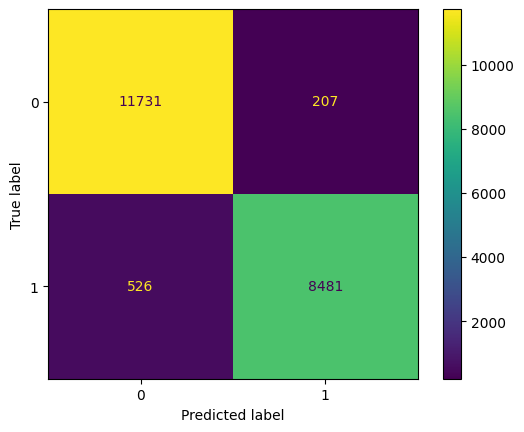

In [9]:
# Confusion matrix and plot for baseline model
cm = metrics.confusion_matrix(y_test, y_pred)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()
# I can visually see that the TP and TN rates are higher compared to LG

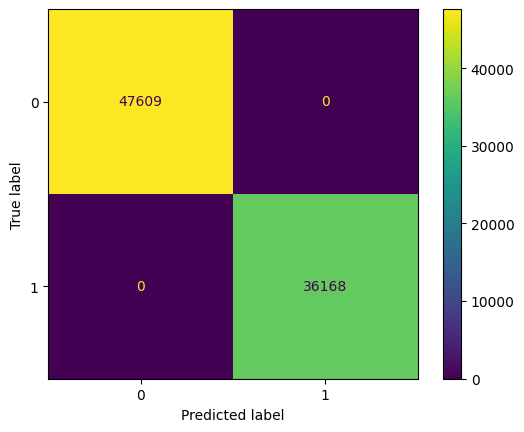

In [24]:
# Confusion matrix and plot for baseline model training set
cm = metrics.confusion_matrix(y_train, y_trainingPrediction)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

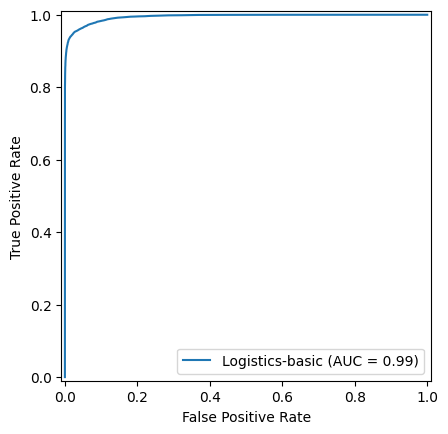

In [10]:
# Plot ROC/AUC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, random_forest.predict_proba(scaleXTest)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc,
                                 estimator_name='Logistics-basic')
display.plot()

plt.show()
# AUC of .99 is very good, the random forest model is very good with predictions

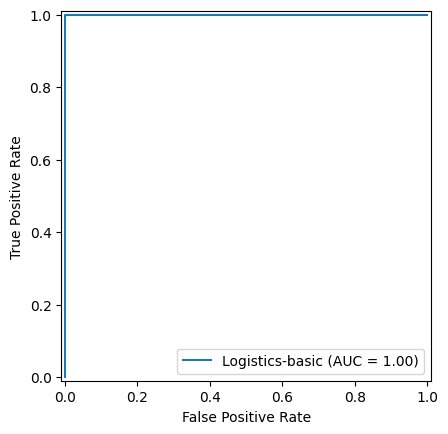

In [25]:
# Plot ROC/AUC curve
fpr, tpr, thresholds = metrics.roc_curve(y_train, random_forest.predict_proba(scaleXTrain)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc,
                                 estimator_name='Logistics-basic')
display.plot()

plt.show()

In [27]:
# The following code is for the second iteratiown of random forest
# For the non-logistic model I will tune hyperparameters with k-fold cross-validation to see if there are any improvements

# With gridsearchCV I had to cut a lot of parameters because my computer is going to take way too long to fit
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
randomForestParams = {
    "n_estimators": [100, 200],
    "criterion": ["gini", "entropy"],  #Log_Loss
   # "max_depth": [5, 10, None],
    "max_features": ["sqrt", "log2"], #None
    #"max_leaf_nodes": [25, 50, 75, 100, None],
    #"min_samples_leaf": [1, 2, 3],
    #"class_weight": ["balanced", "balanced_subsample", None],
}

# https://www.datacamp.com/tutorial/k-fold-cross-validation
# GridSearchCV for random forest, k fold cross validation 5 is default because it gives reliable performance and reduces variability
randomForestGrid = GridSearchCV(
    estimator=random_forest,
    param_grid=randomForestParams,
    scoring="roc_auc",
    cv=5,
)



In [28]:
randomForestGrid.fit(scaleXTrain, y_train)

,estimator,RandomForestC...ndom_state=41)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2'], 'n_estimators': [100, 200]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [29]:
print(randomForestGrid.best_params_)
secondModel = randomForestGrid.best_estimator_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}


In [30]:
# Calculate accuracy
y_pred = secondModel.predict(scaleXTest)
model_accuracy = accuracy_score(y_test, y_pred)
print(f"Model test accuracy: {model_accuracy}")
y_trainingPrediction = secondModel.predict(scaleXTrain)
print(f"Model accuracy for the training set: {accuracy_score(y_train, y_trainingPrediction)}") 

Model test accuracy: 0.965433277631893
Model accuracy for the training set: 1.0


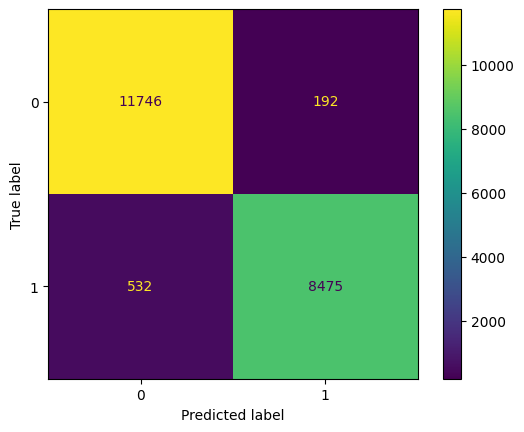

In [ ]:
# Confusion matrix and plot for second iteration
cm = metrics.confusion_matrix(y_test, y_pred)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

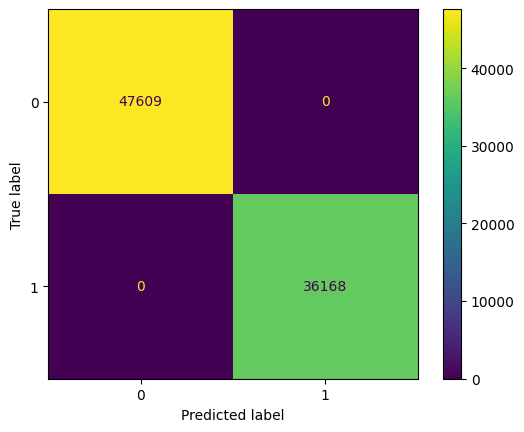

In [32]:
cm = metrics.confusion_matrix(y_train, y_trainingPrediction)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

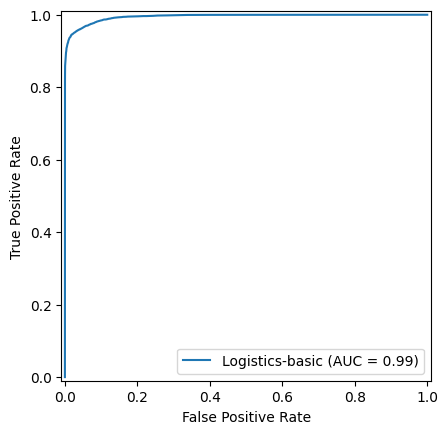

In [33]:
# Plot ROC/AUC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, secondModel.predict_proba(scaleXTest)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc,
                                 estimator_name='Logistics-basic')
display.plot()

plt.show()

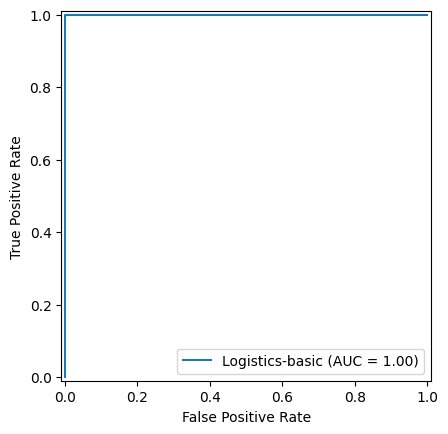

In [34]:
# Plot ROC/AUC curvem for training set
fpr, tpr, thresholds = metrics.roc_curve(y_train, secondModel.predict_proba(scaleXTrain)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc,
                                 estimator_name='Logistics-basic')
display.plot()

plt.show()